In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df=pd.read_csv('TWTR.csv')

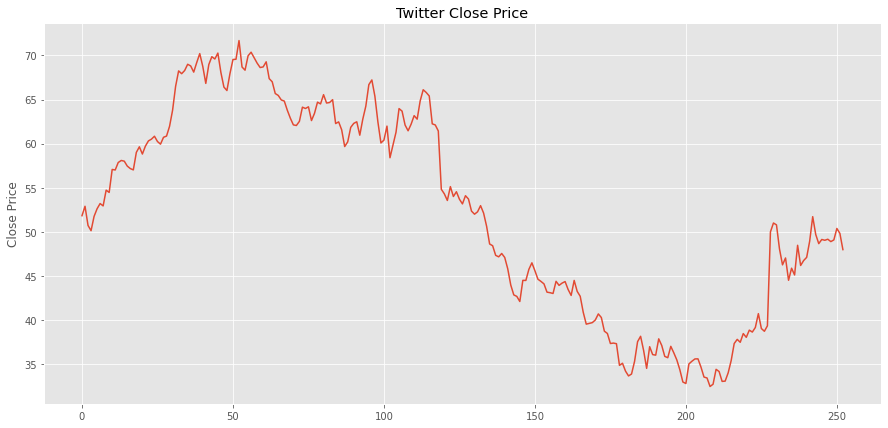

In [8]:
data = pd.read_csv('TWTR.csv')

twtr.columns

columns = ['Close']
data['Close'].plot(figsize=(15,7))
plt.ylabel('Close Price')
plt.title('Twitter Close Price')
plt.show()

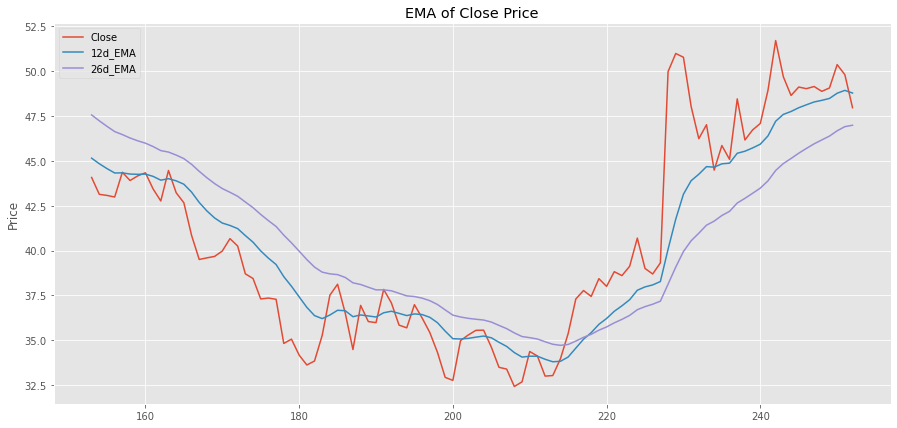

In [9]:
# Calculate exponential moving average
data['12d_EMA'] = data.Close.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.Close.ewm(span=26, adjust=False).mean()

# Plot Close Price and EMA 
data[['Close', '12d_EMA', '26d_EMA']][-100:].plot(figsize=(15, 7))
plt.ylabel('Price')
plt.title('EMA of Close Price')
plt.show()

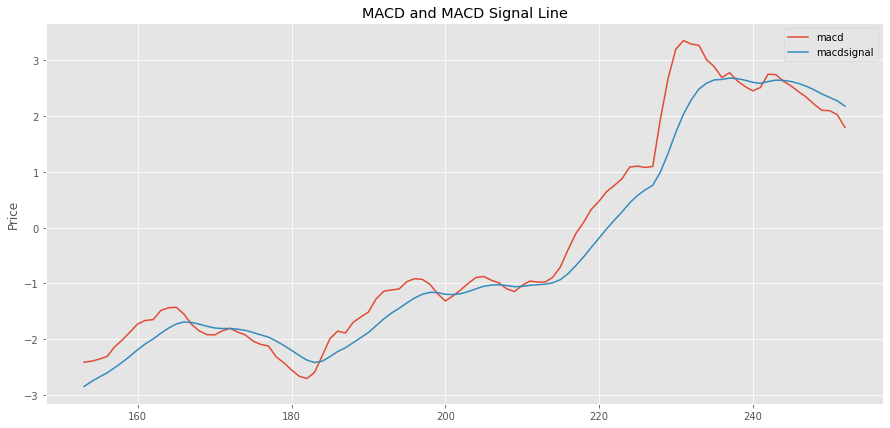

In [10]:
# Calculate MACD line
data['macd'] = data['12d_EMA']- data['26d_EMA'] 

# Calculate MACD Signal line
data['macdsignal'] = data.macd.ewm(span=9, adjust=False).mean()

# Plot MACD and MACD Signal line
data[['macd','macdsignal']][-100:].plot(figsize=(15,7))
plt.ylabel('Price')
plt.title('MACD and MACD Signal Line')
plt.show()

In [11]:
# Column to store trading signals
data['trading_signal'] = np.nan

# Buy signals
data.loc[data['macd'] > data['macdsignal'], 'trading_signal'] = 1

# Sell signals
data.loc[data['macd'] < data['macdsignal'], 'trading_signal'] = -1

# Fill the missing values with last valid observation
data = data.fillna(method = 'ffill')

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,12d_EMA,26d_EMA,macd,macdsignal,trading_signal
248,2022-05-03,49.150002,49.480000,48.750000,48.869999,48.869999,24773000,48.368934,46.161693,2.207241,2.464965,-1.0
249,2022-05-04,48.799999,49.250000,48.340000,49.060001,49.060001,28443000,48.475252,46.376383,2.098869,2.391746,-1.0
250,2022-05-05,50.529999,51.209999,49.810001,50.360001,50.360001,60506900,48.765214,46.671466,2.093748,2.332147,-1.0
251,2022-05-06,49.959999,50.290001,49.500000,49.799999,49.799999,23403200,48.924411,46.903209,2.021203,2.269958,-1.0
252,2022-05-09,49.299999,49.439999,47.625000,47.959999,47.959999,35418884,48.776040,46.981490,1.794551,2.174876,-1.0


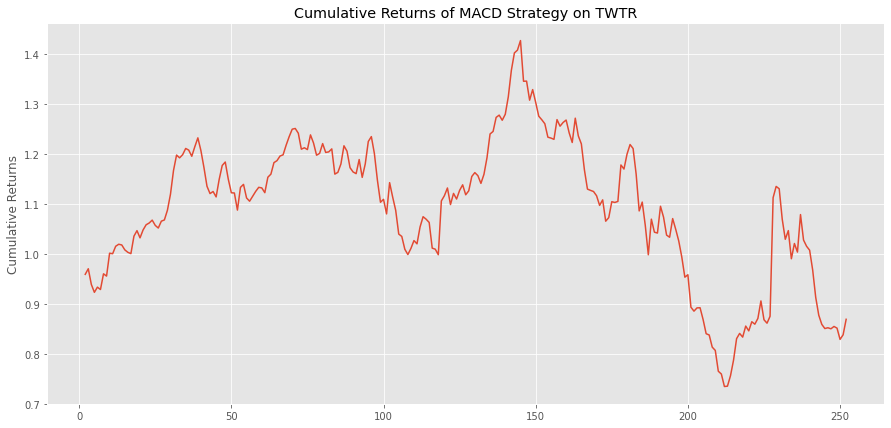

In [12]:
# Calculate daily returns of Twitter
data['returns'] = data.Close.pct_change()

# Calculate daily strategy returns
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate cumulative strategy returns
cumulative_strategy_returns = (data.strategy_returns + 1).cumprod()

# Plot cumulative strategy returns
cumulative_strategy_returns.plot(figsize=(15,7))
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of MACD Strategy on TWTR')
plt.show()

In [13]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
annual_returns = (cumulative_strategy_returns.iloc[-1]**(252/days) - 1)*100

print('The CAGR is %.2f%%' % annual_returns)

The CAGR is -13.07%


In [14]:
# Calculate the annualised volatility
annual_volatility = data.strategy_returns.std() * np.sqrt(252) * 100

print('The annualised volatility is %.2f%%' % annual_volatility)

The annualised volatility is 49.31%


In [15]:
# Assume the annual risk-free rate is 2%
risk_free_rate = 0.02
daily_risk_free_return = risk_free_rate/252

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = data.strategy_returns - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(252)

print('The Sharpe ratio is %.2f' % sharpe_ratio)

The Sharpe ratio is -0.09


# Main Idea:

The main idea of this topic on trading strategies is to determine the returns for a particular investment. Strategies such as moving average (simple, exponential, weighted and convergence/divergence (MACD)) are also implemented in order to gain insights on returns. 

# Applications:

These trading strategies are often employed by financial institutions that have a main focus on choosing the best investment based on historical data. Thus, these strategies are often the industry standard in terms of evaluating the returns of a said asset given the computational limits of the strategy (ex. x amount of days). 

# Purpose:

The purpose of evaluating trading strategies focuses on three main aspects. The first is annualized return. This basically consists of the compund annual growth rate. The second is to determine the annualized rate of volatility. This allows investors to inspect the amount of risk their investment could possibly take on. The third aspect is the Sharpe ratio. This allowed investors to compare said assets with risk free assets such as bonds. It showcased the maximum returns that were possible with each trading strategy that was implemented. 

# Function:

The main function of trading strategies are to obtain a plan that is made for the main function of meeting a mark of profitable return by taking a position in markets. The function of moving averages is to help smooth out data and determine the trend or direction that those assets are moving in.

# Dataset:

The dataset seems to show questionable traits for the tech giant company Twitter. There appears to be negative compounded annual growth rate. This could indicate that in the past five years the value of Twitter has decreased. This could be attributed to censoring and other factors that limit who uses the platform and ultimately their exposure rate. The annualized volatility rate is 49.31%. This means that the company is prone to price fluctuations. This is a bad sign for investors as it indicates the instability of the asset over time. The Sharpe ratio is -0.09. This indicates that the return of a risk free asset is much better than Twitter's. It is also an indication of very little useful information to the investors as all it tells them is it is not expected to grow much when compared to other portfolio investment options.

In conclusion, contrary to the data and the results from the trading strategy calculations Twitter does seem like a good investment.Especially if the Investor (Elon Musk) planned on taking serious strategies to lower the volatilty of Twitter. Also, the increased exposure of Twitter could also prove that the trading strategies implemented based on the historical data of Twitter could be useless as it doesn't take into account regression. 

# Sources:

https://blog.quantinsti.com/python-trading/